In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
import csv
import random

%matplotlib inline

In [3]:
class feedForwardNeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, lr):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.learning_rate = lr
        
        self.num_layers = 3
        
        # link weights from input to hidden layer
        # initalizing this with values from a normal distribution with a mean = 0 and a standard deviation
        # of 1/sqrt(num_nodes) <-- this approach is known to give good results 🤷🏽‍♂️
        # wih = weights from input to hidden layer
        self.wih = np.random.normal(0.0, (1/np.sqrt(input_nodes)), (self.hidden_nodes, self.input_nodes))
        
        # link weights from hidden to output layer 
        self.who = np.random.normal(0.0, (1/np.sqrt(hidden_nodes)), (self.output_nodes, self.hidden_nodes))
    
    def train(self, input_data, targets):
        input_data = np.array(input_data, ndmin=2).T
        targets = np.array(targets, ndmin=2).T
        # First we need to feed forward 
        hidden_input = np.dot(self.wih, input_data)
        hidden_output = self.__sigmoid(hidden_input)
        
        final_input = np.dot(self.who, hidden_output)
        final_output = self.__sigmoid(final_input)
        
        # Now we need to backpropagate and calculate our errors 
        error_final = targets - final_output
        recombined_error_hidden = np.dot(self.who.T, error_final)
        
        # Now we need to calculate the gradient for gradient descent
        # Start backwards by calculating gradient for hidden to output layer 
        gradient_h_o = np.dot((error_final*final_output*(1.0-final_output)), hidden_output.T)
        gradient_i_h = np.dot((recombined_error_hidden*hidden_output*(1.0-hidden_output)), input_data.T)
        
        # Now do the update i.e. Gradient Descent, we are doing a simultaneous update here with every training example.
        # Basically think of it as mini-batch with a batch size of 1
        # Other methods exist such as mini-batch, batch, stochastic etc. 
        self.who += self.learning_rate * gradient_h_o
        self.wih += self.learning_rate * gradient_i_h
        
    def predict(self, input_query):
        input_query = np.array(input_query, ndmin=2).T
        hidden_input = np.dot(self.wih, input_query)
        hidden_output = self.__sigmoid(hidden_input)        
        final_input = np.dot(self.who, hidden_output)
        final_output = self.__sigmoid(final_input)
        
        return np.argmax(final_output)
        
    def normalize_input(self, input_data):
        # Normalizing and scaling our input to avoid large signals in our activation function
        # Expects 1: to be pixel values
        return (np.asfarray(input[1:]) / 255.0 * 0.99) + 0.01
        
    def __sigmoid(self, num):
        return scipy.special.expit(num)
        

In [4]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.3

n = feedForwardNeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

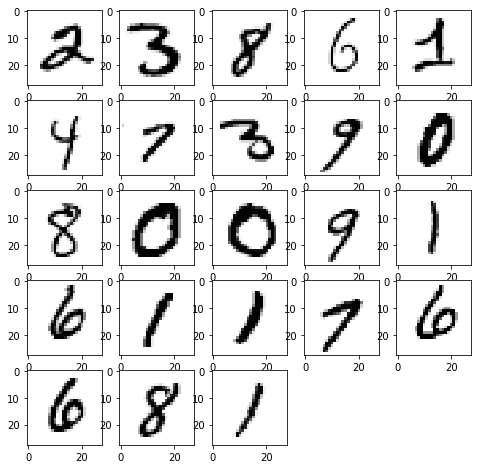

In [5]:
with open('mnist_train_100.csv') as mnist_csv:
    dataset = csv.reader(mnist_csv, delimiter=',')
    
    random_image_samples = plt.figure(figsize=(8,8))
    rand_pos = np.random.randint(low=1, high=101, size=(25,))
    
    count = 1
    pos = 1
    
    for row in dataset:
        # Randomly sample 25 images to display 
        if count in rand_pos:
            image_array = np.asfarray(row[1:]).reshape((28,28))
            random_image_samples.add_subplot(5, 5, pos)
            plt.imshow(image_array, cmap="Greys", interpolation="None")
            pos += 1
        
        target = row[0]
        
        # Normalizing and scaling our input to avoid large signals in our activation function
        input_data = (np.asfarray(row[1:]) / 255.0 * 0.99) + 0.01
        
        # creating the target output value
        targets = np.zeros(10) + 0.01
        targets[int(row[0])] = 0.99
        
        n.train(input_data, targets)
        
        count += 1
    
    plt.show()
        

In [20]:
# Testing the network 

with open('mnist_test_10.csv') as mnist_test_csv:
    total_rows = 10
    
    test_dataset = csv.reader(mnist_test_csv, delimiter=',')
    
    target_list = []
    predicted_list = []
    
    for row in test_dataset:
        target_list.append(int(row[0]))
        prediction = n.predict((np.asfarray(row[1:]) / 255.0 * 0.99) + 0.01)
        predicted_list.append(prediction)
    
    accuracy = ((np.count_nonzero(np.subtract(target_list,predicted_list)==0))/total_rows)*100
    
    print(target_list)
    print(predicted_list)

    print(f"Tested on {total_rows} rows, accuracy: {accuracy}%")
    
        
        
    

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
[7, 3, 1, 0, 4, 1, 3, 3, 1, 7]
Tested on 10 rows, accuracy: 50.0%
